In [27]:
#importing essential libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import plotly.express as px
import plotly.io as pio
warnings.filterwarnings("ignore")

In [29]:
# Import Plotly credentials

import chart_studio

chart_studio.tools.set_credentials_file(username='applepassion4', api_key='f8M7Nvn7twOuid7hAEDS')

import chart_studio.plotly as py
import chart_studio.tools as tls

In [30]:
import plotly.graph_objects as go

#from plotly_credentials import username
#from plotly_credentials import p_key




In [31]:
df=pd.read_csv('diabetes-dataset.csv')

In [32]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [33]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [34]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [35]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [36]:
print(f"the missing values for glucose are : ",len(df.loc[df.Glucose==0]))
print(f"the missing values for insulin are : ",len(df.loc[df.Insulin==0]))
print(f"the missing values for bloodpressure are : ",len(df.loc[df.BloodPressure==0]))
print(f"the missing values for SkinThickness are : ",len(df.loc[df.SkinThickness==0]))
print(f"the missing values for BMI are : ",len(df.loc[df.BMI==0]))

the missing values for glucose are :  13
the missing values for insulin are :  956
the missing values for bloodpressure are :  90
the missing values for SkinThickness are :  573
the missing values for BMI are :  28


In [37]:
from sklearn.impute import SimpleImputer

In [38]:
impute= SimpleImputer(missing_values=0, strategy="mean")

In [39]:
df.iloc[:,1:6]= impute.fit_transform(df.iloc[:,1:6])

In [40]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.975340,72.403665,29.341275,153.743295,32.650101,0.470930,33.090500,0.342000
std,3.306063,30.533114,11.949531,9.123652,80.376307,7.190136,0.323553,11.786423,0.474498
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,120.000000,27.600000,0.244000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,29.341275,153.743295,32.400000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,153.743295,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


CORRELATION HEATMAP SEABORN

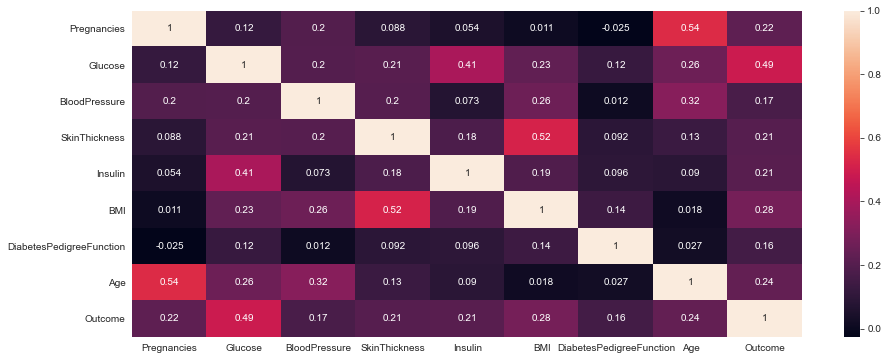

In [41]:
plt.figure(figsize= (15,6))
sns.set_style("darkgrid")
sns.heatmap(df.corr(),annot= True)
plt.show()

In [45]:
age= px.histogram(df,x= "Age", template= "plotly_dark",color= "Outcome",title='Age distribution')
age.show()

In [46]:
py.plot(age, filename = 'Age distribution', auto_open = True)

'https://plotly.com/~applepassion4/4/'

lets see the distribution of Outcome(diabetes or not)

In [43]:
ax= px.pie(df, names= "Outcome",template= "plotly_dark",title= "chances of Diabetes",hole= 0.5)
ax.show()

The dataset is slightly imbalanced wrt to outcome as 65% of patients have low of diabetes and only 34% patients have high chance

In [44]:
py.plot(ax, filename = 'chances of Diabetes', auto_open = True)

'https://plotly.com/~applepassion4/2/'

Glucose and age correlation/ distribution across target variable

In [49]:
age_glucose= px.scatter(df,x= "Glucose",y= "Age",marginal_x='histogram', marginal_y='histogram',size="Age", size_max=20,
              template= "plotly_dark",color= "Outcome",title="age and glucose correlation")
age_glucose.show()

In [50]:
py.plot(age_glucose, filename = 'Age and Glucose Correlation', auto_open = True)

'https://plotly.com/~applepassion4/8/'

blood pressure and age correlation/ distribution across target variable

In [47]:
age_bpressure= px.scatter(df,x= "BloodPressure",y= "Age",marginal_x='histogram', marginal_y='histogram',size="Age", size_max=20,
              template= "plotly_dark",color= "Outcome",title="age and bloodpressure correlation")
age_bpressure.show()

In [48]:
py.plot(age_bpressure, filename = 'Age and Bloodpressure correlation', auto_open = True)

'https://plotly.com/~applepassion4/6/'

Insulin and age correlation/ distribution across target variable

In [32]:
ax= px.scatter(df,x= "Insulin",y= "Age",marginal_x='histogram', marginal_y='histogram',size="Age", size_max=20,
              template= "plotly_dark",color= "Outcome",title="age and Insulin correlation")
ax.show()

3D scatterplot showing correlation between insulin and glucose across ages and it impacts the target variable

In [34]:
ax = px.scatter_3d(df, x="Age", y="Glucose", z="Insulin",template= "plotly_dark",color="Outcome")
ax.show()

Visualizing the BMI and diabetes pedigree function

In [35]:
dt= df.iloc[:,6:]

In [36]:
ax= px.parallel_coordinates(dt, color="Outcome",template= "plotly_dark")
ax.show()

In [37]:
fig = px.area(df, x="Age", y="BMI", color="Outcome",template= "plotly_dark")
fig.show()

In [38]:
dt= df.iloc[:,1:8]

In [39]:
ax = px.box(dt,template= "plotly_dark")
ax.show()